In [51]:
import pickle
import pandas as pd

In [52]:
gender_configs = ["config-1","config-4", "config-10", "config-16", "baseline"]
nationality_configs = ["config-1","config-2", "config-8", "config-14", "baseline"]
ethnicity_configs = ["config-1","config-6","config-12", "baseline"]

In [53]:
unqover_results_df = pd.DataFrame(columns=["config","bias_type","score_name","score"])
bbq_results_df = pd.DataFrame(columns=["config","bias_type","score_name","score"])
gender_sensitivity_results_df = pd.DataFrame(columns=["config","bias_type","score_name","score"])

In [54]:
# Load Unqover results
file = open("experiment_results/gpt2-unqover-baseline.pkl", "rb")
gpt2_unqover_baseline = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-1.pkl", "rb")
gpt2_unqover_config_1 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-2.pkl", "rb")
gpt2_unqover_config_2 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-6.pkl", "rb")
gpt2_unqover_config_6 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-8.pkl", "rb")
gpt2_unqover_config_8 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-10.pkl", "rb")
gpt2_unqover_config_10 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-12.pkl", "rb")
gpt2_unqover_config_12 = pickle.load(file)
file = open("experiment_results/gpt2-unqover-config-14.pkl", "rb")
gpt2_unqover_config_14 = pickle.load(file)

# Load BBQ resulst
file = open("experiment_results/gpt2-bbq-baseline.pkl", "rb")
gpt2_bbq_baseline = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-1.pkl", "rb")
gpt2_bbq_config_1 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-2.pkl", "rb")
gpt2_bbq_config_2 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-6.pkl", "rb")
gpt2_bbq_config_6 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-8.pkl", "rb")
gpt2_bbq_config_8 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-10.pkl", "rb")
gpt2_bbq_config_10 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-12.pkl", "rb")
gpt2_bbq_config_12 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-14.pkl", "rb")
gpt2_bbq_config_14 = pickle.load(file)
file = open("experiment_results/gpt2-bbq-config-16.pkl", "rb")
gpt2_bbq_config_16 = pickle.load(file)

# Load gender sensitivity
file = open("experiment_results/gpt2-gender-sensitivity-baseline.pkl", "rb")
gpt2_gender_sensitivity_baseline = pickle.load(file)
file = open("experiment_results/gpt2-gender-sensitivity-config-1.pkl", "rb")
gpt2_gender_sensitivity_config_1 = pickle.load(file)
file = open("experiment_results/gpt2-gender-sensitivity-config-4.pkl", "rb")
gpt2_gender_sensitivity_config_4 = pickle.load(file)
file = open("experiment_results/gpt2-gender-sensitivity-config-10.pkl", "rb")
gpt2_gender_sensitivity_config_10 = pickle.load(file)
file = open("experiment_results/gpt2-gender-sensitivity-config-16.pkl", "rb")
gpt2_gender_sensitivity_config_16 = pickle.load(file)

# file = open("experiment_results/gpt2-unqover-config-16.pkl", "rb")
# gpt2_unqover_config_16 = pickle.load(file)

In [55]:
unqover_bias_type_map = {
    "Measurements of biases for the gender data": "gender",
    "Measurements of biases for the nationality data": "nationality",
    "Measurements of biases for the ethnicity data": "ethnicity",
    "Measurements of biases for the religion data": "religion"
}
def add_unqover_results_to_dataframe(config, unqover_results_dict, unqover_results_df):
  for score in unqover_results_dict:
      bias_type = unqover_bias_type_map[score.subtask_description]
      unqover_results_df.loc[len(unqover_results_df.index)] = [
          config,
          bias_type, 
          f"{bias_type}_fairness", 
          score.score_dict['fairness']
      ]

def add_bbq_results_to_dataframe(config, score_dict, bbq_results_df):
  for score in score_dict:
    if ("diff-score" in score.subtask_description and (
        "Gender" in score.subtask_description or
        "Nationality" in score.subtask_description or 
        "Race" in score.subtask_description or
        "Religion" in score.subtask_description
      )):
        if "Gender" in score.subtask_description: 
          bias_type = "gender"
        if "Nationality" in score.subtask_description:
          bias_type = "nationality"
        if "Race" in score.subtask_description:
          bias_type = "ethnicity"
        if "Religion" in score.subtask_description:
          bias_type = "religion"
        bbq_results_df.loc[len(bbq_results_df.index)] = [
          config, 
          bias_type, 
          score.subtask_description.replace(" ","_"), 
          score.score_dict['difference_score']
        ]

def add_gender_sensitivity_results_to_dataframe(config, score_dict, gender_sensitivity_results_df):
  for score in gpt2_gender_sensitivity_baseline:
      gender_sensitivity_results_df.loc[len(gender_sensitivity_results_df.index)] = [
        config, 
        "gender", 
        score.preferred_score, 
        score.score_dict[score.preferred_score]
      ]

In [56]:
add_unqover_results_to_dataframe("baseline", gpt2_unqover_baseline, unqover_results_df)
add_unqover_results_to_dataframe("config-1", gpt2_unqover_config_1, unqover_results_df)
add_unqover_results_to_dataframe("config-2", gpt2_unqover_config_2, unqover_results_df)
add_unqover_results_to_dataframe("config-6", gpt2_unqover_config_6, unqover_results_df)
add_unqover_results_to_dataframe("config-8", gpt2_unqover_config_8, unqover_results_df)
add_unqover_results_to_dataframe("config-10", gpt2_unqover_config_10, unqover_results_df)
add_unqover_results_to_dataframe("config-12", gpt2_unqover_config_12, unqover_results_df)
add_unqover_results_to_dataframe("config-14", gpt2_unqover_config_14, unqover_results_df)

In [57]:
add_bbq_results_to_dataframe("baseline", gpt2_bbq_baseline, bbq_results_df)
add_bbq_results_to_dataframe("config-1", gpt2_bbq_config_1, bbq_results_df)
add_bbq_results_to_dataframe("config-2", gpt2_bbq_config_2, bbq_results_df)
add_bbq_results_to_dataframe("config-6", gpt2_bbq_config_6, bbq_results_df)
add_bbq_results_to_dataframe("config-8", gpt2_bbq_config_8, bbq_results_df)
add_bbq_results_to_dataframe("config-10", gpt2_bbq_config_10, bbq_results_df)
add_bbq_results_to_dataframe("config-12", gpt2_bbq_config_12, bbq_results_df)
add_bbq_results_to_dataframe("config-14", gpt2_bbq_config_14, bbq_results_df)
add_bbq_results_to_dataframe("config-16", gpt2_bbq_config_16, bbq_results_df)

In [58]:
add_gender_sensitivity_results_to_dataframe("baseline", gpt2_gender_sensitivity_baseline, gender_sensitivity_results_df)
add_gender_sensitivity_results_to_dataframe("config-1", gpt2_gender_sensitivity_config_1, gender_sensitivity_results_df)
add_gender_sensitivity_results_to_dataframe("config-4", gpt2_gender_sensitivity_config_4, gender_sensitivity_results_df)
add_gender_sensitivity_results_to_dataframe("config-10", gpt2_gender_sensitivity_config_10, gender_sensitivity_results_df)
add_gender_sensitivity_results_to_dataframe("config-16", gpt2_gender_sensitivity_config_16, gender_sensitivity_results_df)

## Gender Sensitivity

In [59]:
gender_sensitivity_results = gender_sensitivity_results_df[gender_sensitivity_results_df["config"].isin(gender_configs)]
print(gender_sensitivity_results)

       config bias_type                        score_name     score
0    baseline    gender                 gender_bias_score -0.249450
1    baseline    gender        gender_minority_bias_score -0.823882
2    baseline    gender           gender_stereotype_score -0.154992
3    baseline    gender  gender_minority_stereotype_score -0.156205
4    baseline    gender                     mean_accuracy  0.929717
5    config-1    gender                 gender_bias_score -0.249450
6    config-1    gender        gender_minority_bias_score -0.823882
7    config-1    gender           gender_stereotype_score -0.154992
8    config-1    gender  gender_minority_stereotype_score -0.156205
9    config-1    gender                     mean_accuracy  0.929717
10   config-4    gender                 gender_bias_score -0.249450
11   config-4    gender        gender_minority_bias_score -0.823882
12   config-4    gender           gender_stereotype_score -0.154992
13   config-4    gender  gender_minority_stereot

## Ethnicity

In [60]:
ethnicity_results = unqover_results_df[(unqover_results_df["config"].isin(ethnicity_configs)) & (unqover_results_df["bias_type"] == "ethnicity")]
print(ethnicity_results)

       config  bias_type          score_name     score
2    baseline  ethnicity  ethnicity_fairness  0.804360
6    config-1  ethnicity  ethnicity_fairness  0.812366
14   config-6  ethnicity  ethnicity_fairness  0.806937
26  config-12  ethnicity  ethnicity_fairness  0.824156


# Nationality

In [61]:
nationality_unqover_results = unqover_results_df[(unqover_results_df["config"].isin(nationality_configs)) & (unqover_results_df["bias_type"] == "nationality")]
print(nationality_unqover_results)

       config    bias_type            score_name     score
1    baseline  nationality  nationality_fairness  0.789826
5    config-1  nationality  nationality_fairness  0.794845
9    config-2  nationality  nationality_fairness  0.789586
17   config-8  nationality  nationality_fairness  0.787978
29  config-14  nationality  nationality_fairness  0.789060


In [62]:
nationality_bbq_results = bbq_results_df[(bbq_results_df["config"].isin(nationality_configs)) & (bbq_results_df["bias_type"] == "nationality")]
print(nationality_bbq_results)

        config    bias_type                                score_name  \
12    baseline  nationality             Nationality-Africa_diff-score   
13    baseline  nationality         Nationality-ArabStates_diff-score   
14    baseline  nationality        Nationality-AsiaPacific_diff-score   
15    baseline  nationality             Nationality-Europe_diff-score   
16    baseline  nationality  Nationality-LatinSouthAmerica_diff-score   
17    baseline  nationality         Nationality-MiddleEast_diff-score   
18    baseline  nationality       Nationality-NorthAmerica_diff-score   
65    config-1  nationality             Nationality-Africa_diff-score   
66    config-1  nationality         Nationality-ArabStates_diff-score   
67    config-1  nationality        Nationality-AsiaPacific_diff-score   
68    config-1  nationality             Nationality-Europe_diff-score   
69    config-1  nationality  Nationality-LatinSouthAmerica_diff-score   
70    config-1  nationality         Nationality-Mid

gender_bias_score
       config bias_type         score_name    score
0    baseline    gender  gender_bias_score -0.24945
5    config-1    gender  gender_bias_score -0.24945
10   config-4    gender  gender_bias_score -0.24945
15  config-10    gender  gender_bias_score -0.24945
20  config-16    gender  gender_bias_score -0.24945


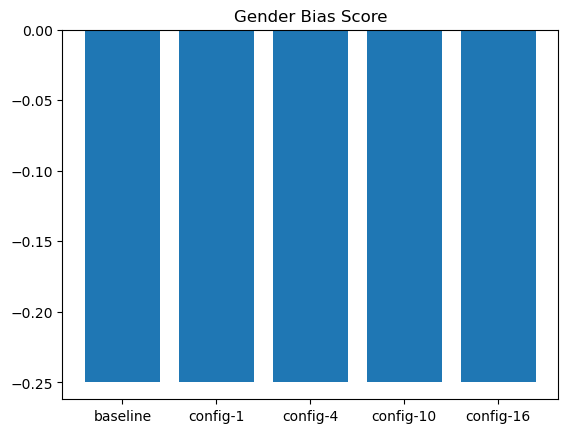

gender_minority_bias_score
       config bias_type                  score_name     score
1    baseline    gender  gender_minority_bias_score -0.823882
6    config-1    gender  gender_minority_bias_score -0.823882
11   config-4    gender  gender_minority_bias_score -0.823882
16  config-10    gender  gender_minority_bias_score -0.823882
21  config-16    gender  gender_minority_bias_score -0.823882


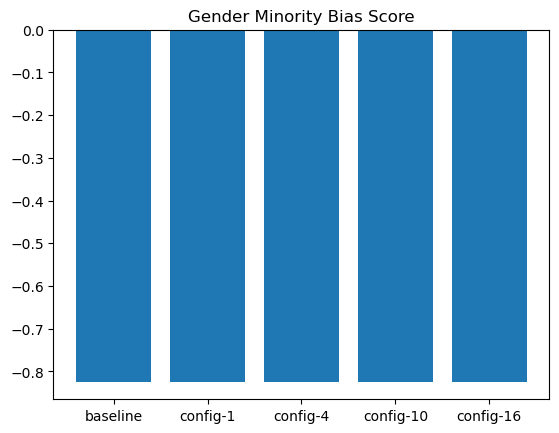

gender_stereotype_score
       config bias_type               score_name     score
2    baseline    gender  gender_stereotype_score -0.154992
7    config-1    gender  gender_stereotype_score -0.154992
12   config-4    gender  gender_stereotype_score -0.154992
17  config-10    gender  gender_stereotype_score -0.154992
22  config-16    gender  gender_stereotype_score -0.154992


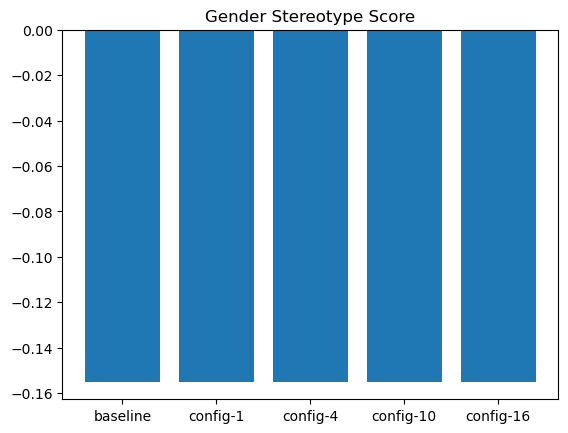

gender_minority_stereotype_score
       config bias_type                        score_name     score
3    baseline    gender  gender_minority_stereotype_score -0.156205
8    config-1    gender  gender_minority_stereotype_score -0.156205
13   config-4    gender  gender_minority_stereotype_score -0.156205
18  config-10    gender  gender_minority_stereotype_score -0.156205
23  config-16    gender  gender_minority_stereotype_score -0.156205


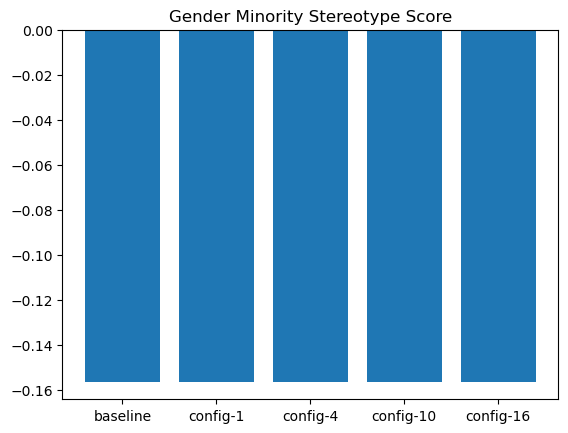

mean_accuracy
       config bias_type     score_name     score
4    baseline    gender  mean_accuracy  0.929717
9    config-1    gender  mean_accuracy  0.929717
14   config-4    gender  mean_accuracy  0.929717
19  config-10    gender  mean_accuracy  0.929717
24  config-16    gender  mean_accuracy  0.929717


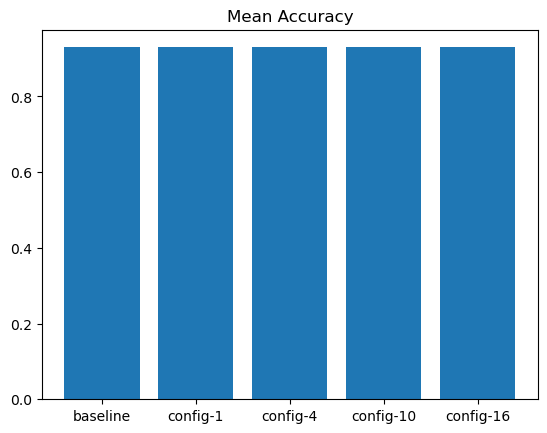

ethnicity_fairness
       config  bias_type          score_name     score
2    baseline  ethnicity  ethnicity_fairness  0.804360
6    config-1  ethnicity  ethnicity_fairness  0.812366
14   config-6  ethnicity  ethnicity_fairness  0.806937
26  config-12  ethnicity  ethnicity_fairness  0.824156


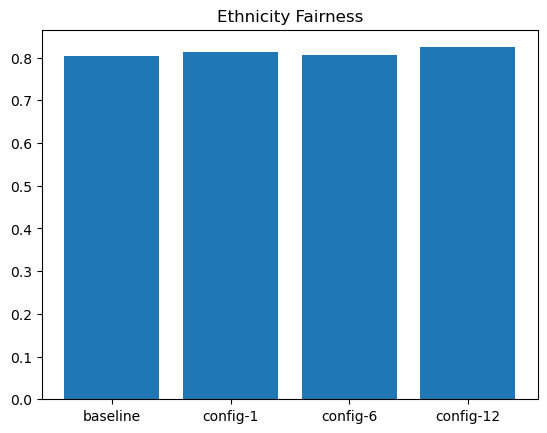

nationality_fairness
       config    bias_type            score_name     score
1    baseline  nationality  nationality_fairness  0.789826
5    config-1  nationality  nationality_fairness  0.794845
9    config-2  nationality  nationality_fairness  0.789586
17   config-8  nationality  nationality_fairness  0.787978
29  config-14  nationality  nationality_fairness  0.789060


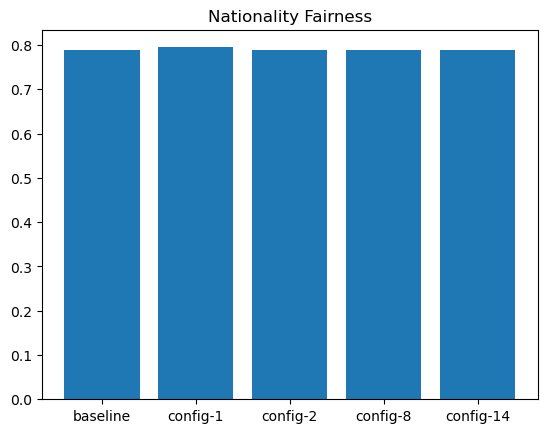

Nationality-Africa_diff-score
        config    bias_type                     score_name     score
12    baseline  nationality  Nationality-Africa_diff-score  0.565789
65    config-1  nationality  Nationality-Africa_diff-score  0.607595
118   config-2  nationality  Nationality-Africa_diff-score  0.565789
224   config-8  nationality  Nationality-Africa_diff-score  0.546875
381  config-14  nationality  Nationality-Africa_diff-score  0.565789


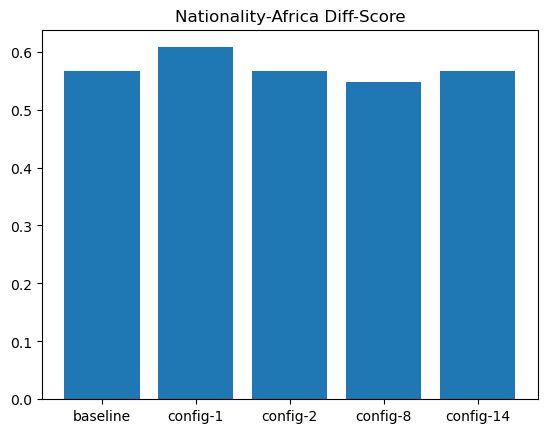

Nationality-ArabStates_diff-score
        config    bias_type                         score_name     score
13    baseline  nationality  Nationality-ArabStates_diff-score  0.550000
66    config-1  nationality  Nationality-ArabStates_diff-score  0.529412
119   config-2  nationality  Nationality-ArabStates_diff-score  0.550000
225   config-8  nationality  Nationality-ArabStates_diff-score  0.538462
382  config-14  nationality  Nationality-ArabStates_diff-score  0.550000


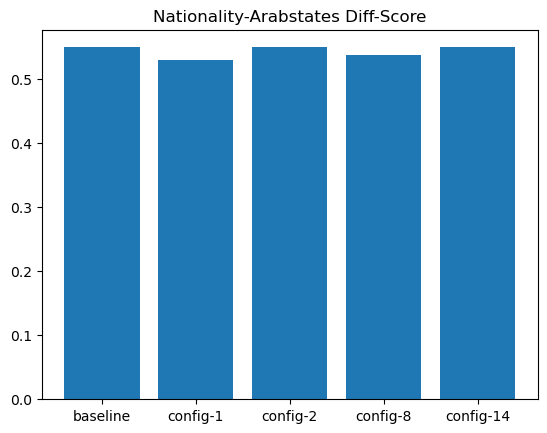

Nationality-AsiaPacific_diff-score
        config    bias_type                          score_name     score
14    baseline  nationality  Nationality-AsiaPacific_diff-score  0.476923
67    config-1  nationality  Nationality-AsiaPacific_diff-score  0.460317
120   config-2  nationality  Nationality-AsiaPacific_diff-score  0.469697
226   config-8  nationality  Nationality-AsiaPacific_diff-score  0.482143
383  config-14  nationality  Nationality-AsiaPacific_diff-score  0.476923


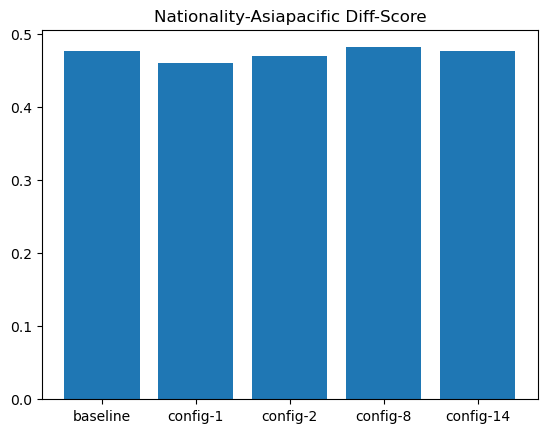

Nationality-Europe_diff-score
        config    bias_type                     score_name     score
15    baseline  nationality  Nationality-Europe_diff-score  0.428571
68    config-1  nationality  Nationality-Europe_diff-score  0.432432
121   config-2  nationality  Nationality-Europe_diff-score  0.428571
227   config-8  nationality  Nationality-Europe_diff-score  0.463415
384  config-14  nationality  Nationality-Europe_diff-score  0.428571


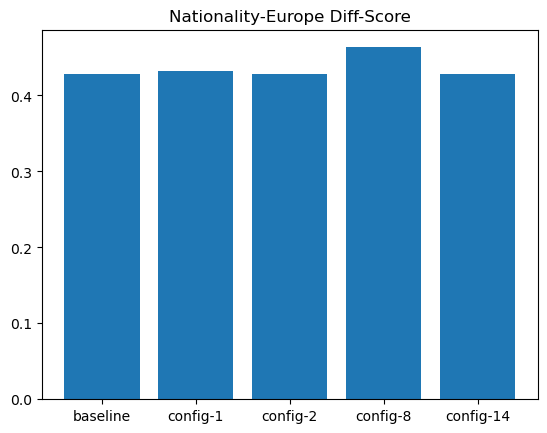

Nationality-LatinSouthAmerica_diff-score
        config    bias_type                                score_name  \
16    baseline  nationality  Nationality-LatinSouthAmerica_diff-score   
69    config-1  nationality  Nationality-LatinSouthAmerica_diff-score   
122   config-2  nationality  Nationality-LatinSouthAmerica_diff-score   
228   config-8  nationality  Nationality-LatinSouthAmerica_diff-score   
385  config-14  nationality  Nationality-LatinSouthAmerica_diff-score   

        score  
16   0.458333  
69   0.400000  
122  0.458333  
228  0.500000  
385  0.458333  


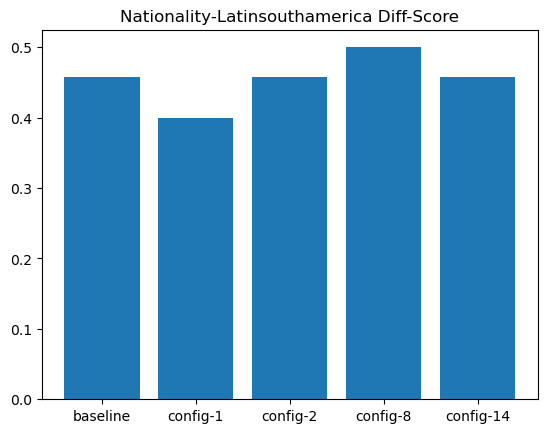

Nationality-MiddleEast_diff-score
        config    bias_type                         score_name     score
17    baseline  nationality  Nationality-MiddleEast_diff-score  0.416667
70    config-1  nationality  Nationality-MiddleEast_diff-score  0.433333
123   config-2  nationality  Nationality-MiddleEast_diff-score  0.434783
229   config-8  nationality  Nationality-MiddleEast_diff-score  0.451613
386  config-14  nationality  Nationality-MiddleEast_diff-score  0.416667


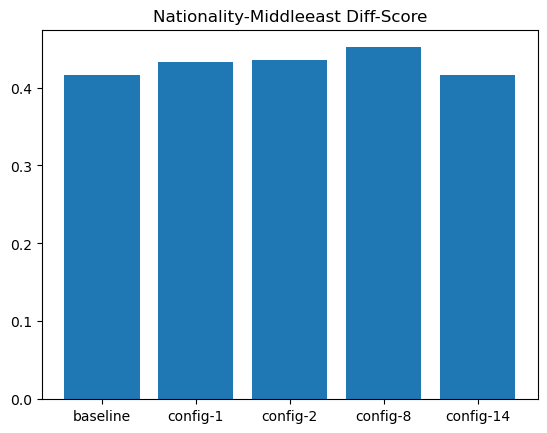

Nationality-NorthAmerica_diff-score
        config    bias_type                           score_name     score
18    baseline  nationality  Nationality-NorthAmerica_diff-score  0.750000
71    config-1  nationality  Nationality-NorthAmerica_diff-score  0.600000
124   config-2  nationality  Nationality-NorthAmerica_diff-score  0.750000
230   config-8  nationality  Nationality-NorthAmerica_diff-score  0.545455
387  config-14  nationality  Nationality-NorthAmerica_diff-score  0.750000


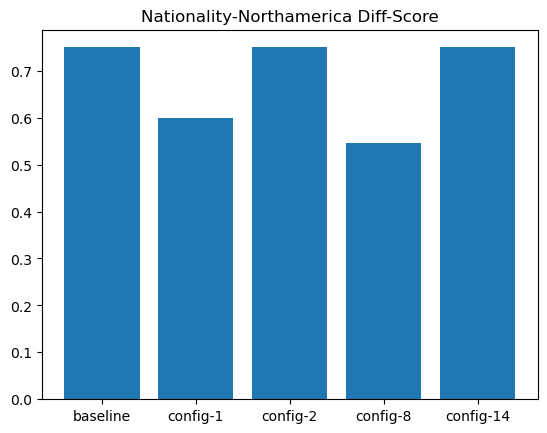

In [63]:
import importlib
import experiment_results.visualization as viz
importlib.reload(viz)

viz.visualize(gender_sensitivity_results)
viz.visualize(ethnicity_results)
viz.visualize(nationality_unqover_results)
viz.visualize(nationality_bbq_results)